In [1]:
import netCDF4 as nc
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

In [2]:
# - read in GPP and SIF data
gpp_file = '/Users/nmacbean/TEACHING/IU/Fall2019/Fall2019_G489_589/data/gpp_sif/orch_gpp_monthly_2007-2011.nc'
gpp_f=nc.Dataset(gpp_file,'r')
gpp_data = gpp_f.variables['GPP'][:]
gpp_f.close()


In [3]:
# - create an array to save the slope
nlats, nlons = np.shape(gpp_data)[1], np.shape(gpp_data)[2]
gpp_trend = np.zeros( (nlats, nlons) )

In [16]:
# - X = time axis --> will be same for all grid cells
nmonths = np.shape(gpp_data)[0]
X = np.arange(nmonths).reshape(-1,1)

In [17]:
# - for loop over rows and cols
for i in xrange(np.shape(gpp_data)[1]):
    for j in xrange(np.shape(gpp_data)[2]):
        
        # - continue if masked
        if np.ma.is_masked(gpp_data[:,i,j]):
            gpp_trend[i,j] = np.nan
            continue
        
        # - set up y
        y = gpp_data[:,i,j].reshape(-1,1)
        
        # - set up model
        lm = linear_model.LinearRegression()
        model = lm.fit(X, y)
        
        # - save slope coef to gpp_slope array
        gpp_trend[i,j] = model.coef_[0][0]

In [18]:
print(gpp_trend)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


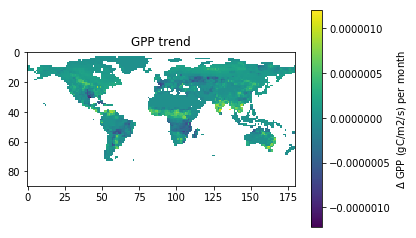

In [25]:
# -
# - Create the global plot
# -
# - Note: the exact values will depend on what you used for the time axis. 
# - Given the time axis I used (array for nmonths), this is effectively change in GPP (gC/m2/s) per month
# - However, you should have the same spatial pattern on your map as I have below

# - plot
plt.imshow(gpp_trend)

cbar = plt.colorbar()
cbar.set_label('$\Delta$ GPP (gC/m2/s) per month')

plt.title('GPP trend')

plt.show()

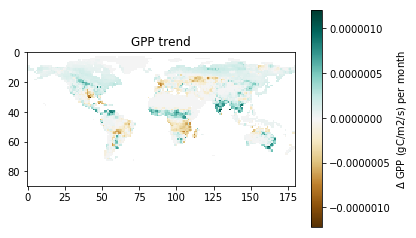

In [26]:
# - plot: useful to have a diverging colorbar for positive and negative values: https://matplotlib.org/examples/color/colormaps_reference.html
plt.imshow(gpp_trend, cmap="BrBG")

cbar = plt.colorbar()
cbar.set_label('$\Delta$ GPP (gC/m2/s) per month')

plt.title('GPP trend')

plt.show()